<a href="https://colab.research.google.com/github/Winnie-Mukunzi/2024_repository/blob/main/03_04_2024_Optimal_pension_assets_asset_portfolio_selection_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Optimal assets' portfolio selection using machine learning**


By ***Winfred Mukunzi*** (149267)

**Introduction**

Pension schemes face significant challenges in navigating the uncertainties of financial markets, especially when it comes to selecting the right asset portfolio that can maximize the Return on Investment (ROI). As such, pension schemes, which serve as platforms for members to make regular retirement savings, rely on other parties like Fund Managers (FM) to help in selecting and investing pension funds. When these regular contributions are wisely invested, members can generate additional income. However, if pension funds fail to make proactive and informed decisions regarding the investment of these funds, members may end up with minimal or no income from their savings.

**The study objective are:**


*   To develop machine learning model to optimize asset portfolio selection for pension funds.
*   Assess the effectiveness of the developed model by comparing its performance against traditional methods.
*   Evaluate the impact of the developed model on the financial performance of pension funds in terms of their ability to generate more income for scheme members.








**Assumptions:**


*   The assumption that historical financial data (returns, volatility, correlations, etc.) is a reliable indicator of future market behavior.

*   That the risk-free rate will be approximated by a reliable benchmarks of government securities, which are considered low risk.


*   The model may have incorporated an assumed level of investor risk aversion, reflecting the preference of investors for lower-risk portfolios.







**Scope**

This project included analyzing the historical financial returns on value of assets and investment income from 2013 to 2023. Assets to which pension schemes in Kenya invest in were analysed.


#Libraries

In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime,timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#Understanding the data

PensionFunds_Data_2.csv:

The data was obtained from the audited annual accounts of pension schemes, covering the period from 2013 to 2023, which constitutes nearly a decade of data.

The data has the following attributes.

*   **REF** - Pension Scheme registration No. e.g. 2014

*   **Asset value** e.g. 1,000,000,000

*   **Asset class** e.g. Immovable Property, guaranteed fund.

*   **Period** Report period

*   **RR** This is return on investment






**List of asset classes**


*   Cash, Demand & Fixed Deposit
*   Commercial Paper and Corporate Bonds
*   Guaranteed Funds
*   Immovable Property
*   Kenya Government Securities
*   Offshore Investments
*   Property Unit Trusts
*   Quoted Equity
*   Unquoted Equity


# Data pre-processing

In [3]:
#Read the data

df = pd.read_csv("https://raw.githubusercontent.com/Winnie-Mukunzi/Dissertation_updated/main/PensionAssets_30112023.csv")
df.head()

,Ref,Period,Ref_Period,"Cash, Demand & Fixed Deposits",Cash and Demand Deposits,Commercial Paper and Corporate Bonds,Fixed and Time Deposits,Guaranteed Funds,Immovable Property,Kenya Government Securities,...,"Cash, Demand & Fixed Deposits - Income",Commercial Paper and Corporate Bonds - Income,Fixed and Time Deposits - Income,Guaranteed Funds - Income,Immovable Property - Income,Kenya Government Securities - Income,Offshore Investments - Income,Property Unit Trusts - Income,Quoted Equity - Income,Unquoted Equity - Income
0,1,Jun-14,1 41791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Dec-14,1 41974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,Dec-15,1 42339,0.0,0.0,0.0,0.0,16857240.0,0.0,0.0,...,0.0,0.0,0.0,1219378.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,Dec-16,1 42705,0.0,0.0,0.0,0.0,21291790.0,0.0,0.0,...,0.0,0.0,0.0,1644931.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,Dec-17,1 43070,0.0,0.0,0.0,0.0,26433672.0,0.0,0.0,...,0.0,0.0,0.0,2238169.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Data attributes and records

df.shape

(12241, 24)

In [5]:
#Compute Return on Investment (ROI)

# Assuming df is your DataFrame
df['ROI-Demand DEPs'] = df['Cash, Demand & Fixed Deposits - Income'] / df['Cash, Demand & Fixed Deposits']
df['ROI-C & C Bonds'] = df['Commercial Paper and Corporate Bonds - Income'] / df['Commercial Paper and Corporate Bonds']
df['ROI-Fixed DEPs'] = df['Fixed and Time Deposits - Income'] / df['Fixed and Time Deposits']
df['ROI-GFs'] = df['Guaranteed Funds - Income'] / df['Guaranteed Funds']
df['ROI-IProperty'] = df['Immovable Property - Income'] / df['Immovable Property']
df['ROI-Government SECs'] = df['Kenya Government Securities - Income'] / df['Kenya Government Securities']
df['ROI-Offshore INVE'] = df['Offshore Investments - Income'] / df['Offshore Investments']
df['ROI-P Unit Trusts'] = df['Property Unit Trusts - Income'] / df['Property Unit Trusts']
df['ROI-Qouted EQ'] = df['Quoted Equity - Income'] / df['Quoted Equity']
df['ROI-UNQouted EQ'] = df['Unquoted Equity - Income'] / df['Unquoted Equity']

df.tail()

,Ref,Period,Ref_Period,"Cash, Demand & Fixed Deposits",Cash and Demand Deposits,Commercial Paper and Corporate Bonds,Fixed and Time Deposits,Guaranteed Funds,Immovable Property,Kenya Government Securities,...,ROI-Demand DEPs,ROI-C & C Bonds,ROI-Fixed DEPs,ROI-GFs,ROI-IProperty,ROI-Government SECs,ROI-Offshore INVE,ROI-P Unit Trusts,ROI-Qouted EQ,ROI-UNQouted EQ
12236,999,Dec-18,999 43435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12237,999,Dec-19,999 43800,0.0,0.0,0.0,0.0,182887026.0,0.0,0.0,...,NaN,NaN,NaN,0.106941,NaN,NaN,NaN,NaN,NaN,NaN
12238,999,Jun-20,999 43983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12239,999,Dec-20,999 44166,0.0,0.0,0.0,0.0,88353208.0,0.0,0.0,...,NaN,NaN,NaN,0.176389,NaN,NaN,NaN,NaN,NaN,NaN
12240,999,Dec-21,999 44531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['Ref', 'Period', 'Ref_Period', 'Cash, Demand & Fixed Deposits',
       'Cash and Demand Deposits', 'Commercial Paper and Corporate Bonds',
       'Fixed and Time Deposits', 'Guaranteed Funds', 'Immovable Property',
       'Kenya Government Securities', 'Offshore Investments',
       'Property Unit Trusts', 'Quoted Equity', 'Unquoted Equity',
       'Cash, Demand & Fixed Deposits - Income',
       'Commercial Paper and Corporate Bonds - Income',
       'Fixed and Time Deposits - Income', 'Guaranteed Funds - Income',
       'Immovable Property - Income', 'Kenya Government Securities - Income',
       'Offshore Investments - Income', 'Property Unit Trusts - Income',
       'Quoted Equity - Income', 'Unquoted Equity - Income', 'ROI-Demand DEPs',
       'ROI-C & C Bonds', 'ROI-Fixed DEPs', 'ROI-GFs', 'ROI-IProperty',
       'ROI-Government SECs', 'ROI-Offshore INVE', 'ROI-P Unit Trusts',
       'ROI-Qouted EQ', 'ROI-UNQouted EQ'],
      dtype='object')

In [7]:
cdf = df[['Period', 'ROI-Demand DEPs',
       'ROI-C & C Bonds', 'ROI-Fixed DEPs', 'ROI-GFs', 'ROI-IProperty',
       'ROI-Government SECs', 'ROI-Offshore INVE', 'ROI-P Unit Trusts',
       'ROI-Qouted EQ', 'ROI-UNQouted EQ' ]]
cdf.head()

,Period,ROI-Demand DEPs,ROI-C & C Bonds,ROI-Fixed DEPs,ROI-GFs,ROI-IProperty,ROI-Government SECs,ROI-Offshore INVE,ROI-P Unit Trusts,ROI-Qouted EQ,ROI-UNQouted EQ
0,Jun-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dec-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dec-15,NaN,NaN,NaN,0.072336,NaN,NaN,NaN,NaN,NaN,NaN
3,Dec-16,NaN,NaN,NaN,0.077257,NaN,NaN,NaN,NaN,NaN,NaN
4,Dec-17,NaN,NaN,NaN,0.084671,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Convert 'Period' column to datetime format
cdf['Period'] = pd.to_datetime(cdf['Period'], format='%b-%y')

# Set 'Period' as the index
cdf.set_index('Period', inplace=True)

In [9]:
cdf.columns

Index(['ROI-Demand DEPs', 'ROI-C & C Bonds', 'ROI-Fixed DEPs', 'ROI-GFs',
       'ROI-IProperty', 'ROI-Government SECs', 'ROI-Offshore INVE',
       'ROI-P Unit Trusts', 'ROI-Qouted EQ', 'ROI-UNQouted EQ'],
      dtype='object')

In [10]:
cdf = cdf.sort_index(ascending=True)
cdf.head()

,ROI-Demand DEPs,ROI-C & C Bonds,ROI-Fixed DEPs,ROI-GFs,ROI-IProperty,ROI-Government SECs,ROI-Offshore INVE,ROI-P Unit Trusts,ROI-Qouted EQ,ROI-UNQouted EQ
Period,,,,,,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Compute mean for each period and exclude Missing values from the computations for ach of the asset class.

In [12]:
# Columns to compute mean for
columns_to_mean = ['ROI-Demand DEPs', 'ROI-C & C Bonds', 'ROI-Fixed DEPs',
                   'ROI-GFs', 'ROI-IProperty', 'ROI-Government SECs',
                   'ROI-Offshore INVE', 'ROI-P Unit Trusts', 'ROI-Qouted EQ',
                   'ROI-UNQouted EQ']

# Compute mean for each period without counting missing values
cdf_2 = cdf[columns_to_mean].resample('m').mean()

pd.set_option('display.float_format', '{:.2f}'.format)

cdf_2.shape

(120, 10)

In [13]:
cdf_2.head()

,ROI-Demand DEPs,ROI-C & C Bonds,ROI-Fixed DEPs,ROI-GFs,ROI-IProperty,ROI-Government SECs,ROI-Offshore INVE,ROI-P Unit Trusts,ROI-Qouted EQ,ROI-UNQouted EQ
Period,,,,,,,,,,
2013-01-31,0.15,0.10,0.00,0.09,NaN,0.11,0.00,NaN,0.03,NaN
2013-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-31,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Missing values

cdf_2 = cdf_2.fillna(method='ffill')
cdf_2.head()

,ROI-Demand DEPs,ROI-C & C Bonds,ROI-Fixed DEPs,ROI-GFs,ROI-IProperty,ROI-Government SECs,ROI-Offshore INVE,ROI-P Unit Trusts,ROI-Qouted EQ,ROI-UNQouted EQ
Period,,,,,,,,,,
2013-01-31,0.15,0.10,0.00,0.09,NaN,0.11,0.00,NaN,0.03,NaN
2013-02-28,0.15,0.10,0.00,0.09,NaN,0.11,0.00,NaN,0.03,NaN
2013-03-31,0.15,0.10,0.00,0.03,NaN,0.11,0.00,NaN,0.03,NaN
2013-04-30,0.15,0.10,0.00,0.03,NaN,0.11,0.00,NaN,0.03,NaN
2013-05-31,0.15,0.10,0.00,0.03,NaN,0.11,0.00,NaN,0.03,NaN


In [15]:
# Replace NaN values with the mean of each column
cdf_2 = cdf_2.fillna(cdf_2.mean())

# Replace negative values with the mean of each column
for column in cdf_2.columns:
    feature_mean = cdf_2[column].mean()
    cdf_2[column] = np.where((cdf_2[column].isnull()) | (cdf_2[column] < 0), feature_mean, cdf_2[column])

cdf_2.head()

,ROI-Demand DEPs,ROI-C & C Bonds,ROI-Fixed DEPs,ROI-GFs,ROI-IProperty,ROI-Government SECs,ROI-Offshore INVE,ROI-P Unit Trusts,ROI-Qouted EQ,ROI-UNQouted EQ
Period,,,,,,,,,,
2013-01-31,0.15,0.10,0.00,0.09,0.02,0.11,0.00,inf,0.03,0.00
2013-02-28,0.15,0.10,0.00,0.09,0.02,0.11,0.00,inf,0.03,0.00
2013-03-31,0.15,0.10,0.00,0.03,0.02,0.11,0.00,inf,0.03,0.00
2013-04-30,0.15,0.10,0.00,0.03,0.02,0.11,0.00,inf,0.03,0.00
2013-05-31,0.15,0.10,0.00,0.03,0.02,0.11,0.00,inf,0.03,0.00


In [16]:
#Cleaning inf values

# 'Period' being index column
columns_to_process = ['ROI-Demand DEPs', 'ROI-C & C Bonds', 'ROI-Fixed DEPs',
                       'ROI-GFs', 'ROI-IProperty', 'ROI-Government SECs',
                       'ROI-Offshore INVE', 'ROI-P Unit Trusts', 'ROI-Qouted EQ',
                       'ROI-UNQouted EQ']

# Replace 'inf' with NaN
cdf_2.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN values with the mean of each column
mean_values = cdf_2[columns_to_process].mean()
cdf_2[columns_to_process] = cdf_2[columns_to_process].fillna(mean_values)

pd.set_option('display.float_format', '{:.2f}'.format)

cdf_2.head()

,ROI-Demand DEPs,ROI-C & C Bonds,ROI-Fixed DEPs,ROI-GFs,ROI-IProperty,ROI-Government SECs,ROI-Offshore INVE,ROI-P Unit Trusts,ROI-Qouted EQ,ROI-UNQouted EQ
Period,,,,,,,,,,
2013-01-31,0.15,0.10,0.00,0.09,0.02,0.11,0.00,0.05,0.03,0.00
2013-02-28,0.15,0.10,0.00,0.09,0.02,0.11,0.00,0.05,0.03,0.00
2013-03-31,0.15,0.10,0.00,0.03,0.02,0.11,0.00,0.05,0.03,0.00
2013-04-30,0.15,0.10,0.00,0.03,0.02,0.11,0.00,0.05,0.03,0.00
2013-05-31,0.15,0.10,0.00,0.03,0.02,0.11,0.00,0.05,0.03,0.00


In [17]:
#Clean outliers

# List of columns to process
columns_to_process = ['ROI-Demand DEPs', 'ROI-C & C Bonds',
                       'ROI-GFs', 'ROI-IProperty', 'ROI-Government SECs',
                       'ROI-Offshore INVE', 'ROI-P Unit Trusts', 'ROI-Qouted EQ',
                       'ROI-UNQouted EQ']

# Replace values greater than 1 with NAN
cdf_2[columns_to_process] = np.where(cdf_2[columns_to_process] > 0.3, np.nan, cdf_2[columns_to_process])

# Replace NaN values with the mean of each column
mean_values = cdf_2[columns_to_process].mean()
cdf_2[columns_to_process] = cdf_2[columns_to_process].fillna(mean_values)


In [18]:
cdf_3 = cdf_2.drop('ROI-Fixed DEPs', axis=1)

##CBR_Data

In [19]:
# Monthly Central Bank Rate Data


# Load the data
cbk_rate = pd.read_csv("https://raw.githubusercontent.com/Winnie-Mukunzi/Module-IV/main/Central_Bank_Rate_data.csv")

# Convert 'Date' column to datetime format
cbk_rate['Date'] = pd.to_datetime(cbk_rate['Date'], format='%y-%m-%d')

# Set the 'Date' column as the index
cbk_rate.set_index('Date', inplace=True)

# Group by month and take the mean rate for each month
monthly_cbk_rate = cbk_rate.groupby(pd.Grouper(freq='M')).mean()

# Create a complete date range with all months included
complete_date_range = pd.date_range(start=monthly_cbk_rate.index.min(), end=monthly_cbk_rate.index.max(), freq='M')

# Reindex the DataFrame to include the complete date range
monthly_cbk_rate = monthly_cbk_rate.reindex(complete_date_range)

# Forward fill missing values within each group
monthly_cbk_rate = monthly_cbk_rate.ffill()

# Adjust the date to represent the end of each month
monthly_cbk_rate.index = monthly_cbk_rate.index + pd.offsets.MonthEnd(0)

# Filter data to include only dates between January 2013 and December 2023
cbk_rate_final = monthly_cbk_rate['2013-01':'2023-12']

# Display the updated DataFrame
print(cbk_rate_final)


            Central_Bank_Rate
2013-01-31               9.50
2013-02-28               9.50
2013-03-31               9.50
2013-04-30               9.50
2013-05-31               9.50
...                       ...
2023-08-31              10.50
2023-09-30               9.00
2023-10-31               9.00
2023-11-30               9.38
2023-12-31               9.38

[132 rows x 1 columns]


#Visualizations

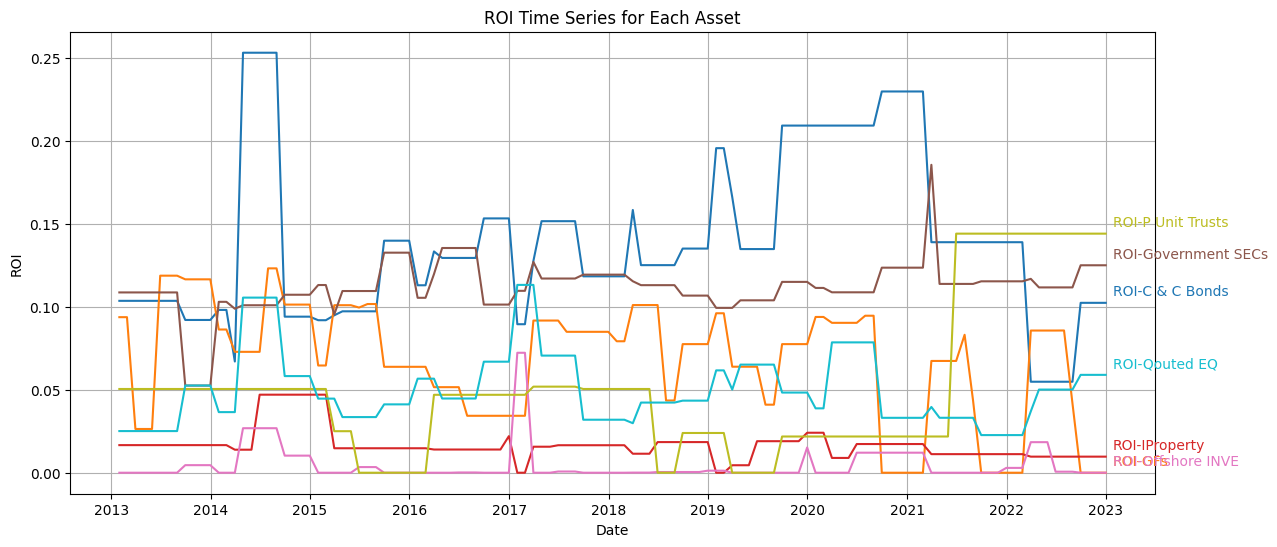

In [20]:
#Visualize all the asset classes in a time series plot.

# List of columns to plot
columns_to_plot = ['ROI-C & C Bonds','ROI-GFs','ROI-IProperty', 'ROI-Government SECs', 'ROI-Offshore INVE',
                   'ROI-P Unit Trusts', 'ROI-Qouted EQ']

# Set a larger figure size
plt.figure(figsize=(14, 6))

# Use the 'tab10' colormap for distinct colors
colors = plt.cm.tab10(np.linspace(0, 1, len(columns_to_plot)))

# Plot each column with a different color
for column, color in zip(columns_to_plot, colors):
    plt.plot(cdf_3.index, cdf_3[column], label=column, color=color)

    # Annotate the last value of each line inside the graph
    plt.annotate(f'{column}', xy=(cdf_2.index[-1], cdf_3[column].iloc[-1]),
                 xytext=(5, 5), textcoords='offset points', color=color)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('ROI')
plt.title('ROI Time Series for Each Asset')
plt.grid()
plt.show()

In [21]:
#Describe the cleaned data set

cdf_3.describe()

,ROI-Demand DEPs,ROI-C & C Bonds,ROI-GFs,ROI-IProperty,ROI-Government SECs,ROI-Offshore INVE,ROI-P Unit Trusts,ROI-Qouted EQ,ROI-UNQouted EQ
count,120.00,120.00,120.00,120.00,120.00,120.00,120.00,120.00,120.00
mean,0.10,0.14,0.07,0.02,0.11,0.00,0.05,0.05,0.00
std,0.04,0.05,0.04,0.01,0.02,0.01,0.04,0.02,0.00
min,0.02,0.05,0.00,0.00,0.05,0.00,0.00,0.02,0.00
25%,0.06,0.10,0.04,0.01,0.11,0.00,0.02,0.03,0.00
50%,0.10,0.13,0.08,0.02,0.11,0.00,0.05,0.04,0.00
75%,0.13,0.15,0.09,0.02,0.12,0.00,0.05,0.06,0.00
max,0.19,0.25,0.12,0.05,0.19,0.07,0.14,0.11,0.02


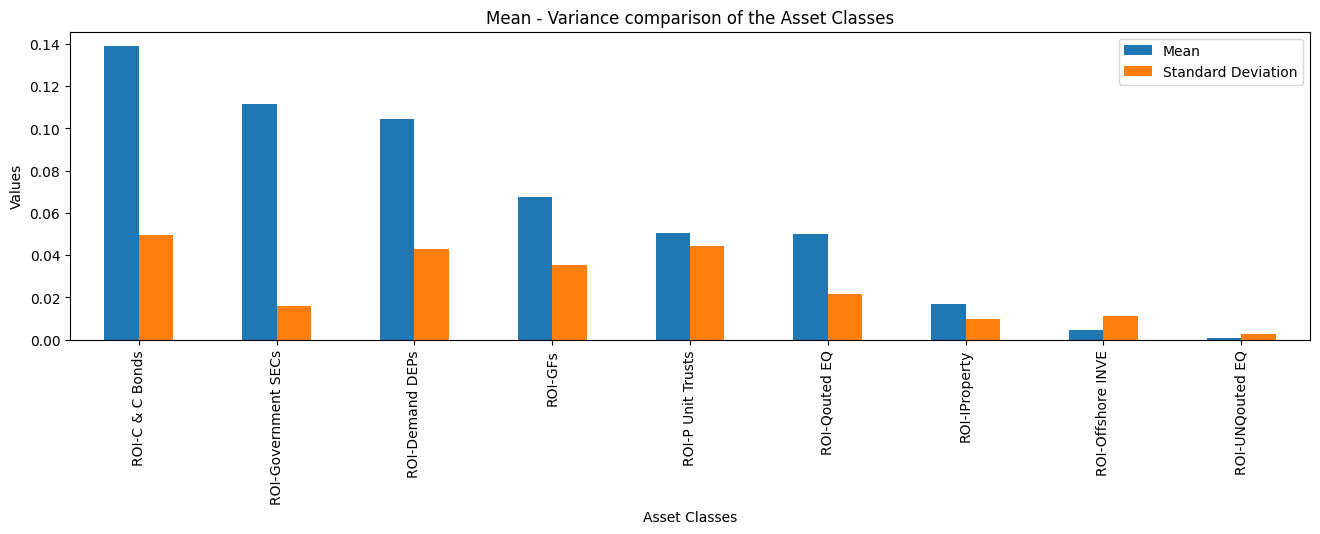

In [22]:
# Bar gragh of mean vs standard deviation of the assets

# Select only mean and std rows
mean_variance_summary = cdf_3.describe().loc[['mean', 'std']]

# Transpose for easier plotting
mean_variance_summary = mean_variance_summary.transpose()

# Sort by mean in descending order
mean_variance_summary_sorted = mean_variance_summary.sort_values(by='mean', ascending=False)

# Plot as a bar graph
mean_variance_summary_sorted.plot(kind='bar', figsize=(16, 4))
plt.xlabel('Asset Classes')
plt.ylabel('Values')
plt.title('Mean - Variance comparison of the Asset Classes')
plt.legend(['Mean', 'Standard Deviation'])
plt.show()



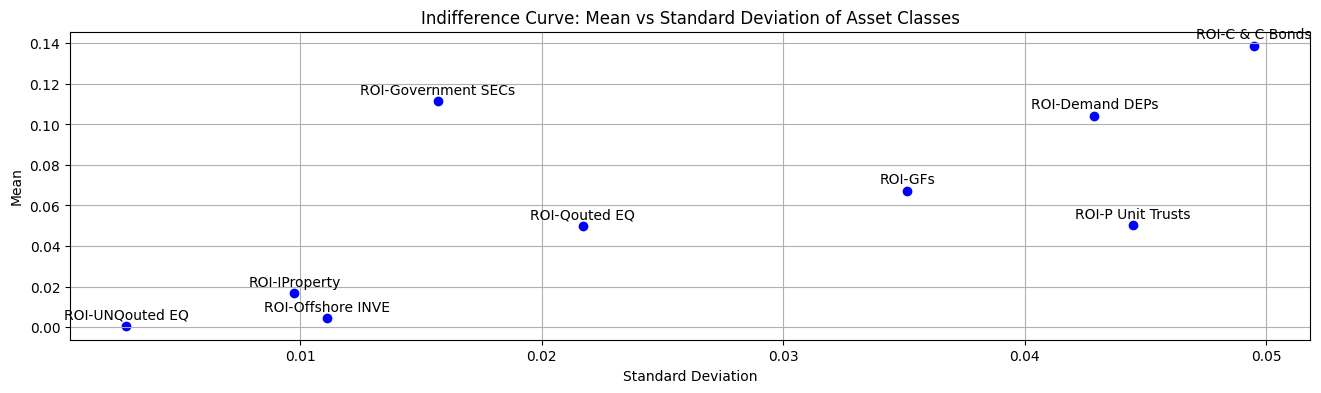

In [23]:
#Plot a indifference curve

# Select only mean and std rows
mean_variance_summary = cdf_3.describe().loc[['mean', 'std']]

# Transpose for easier plotting
mean_variance_summary = mean_variance_summary.transpose()

# Plot mean against standard deviation
plt.figure(figsize=(16, 4))
plt.scatter(mean_variance_summary['std'], mean_variance_summary['mean'], color='blue')
plt.xlabel('Standard Deviation')
plt.ylabel('Mean')
plt.title('Indifference Curve: Mean vs Standard Deviation of Asset Classes')

# Annotate each point with the asset class
for i, txt in enumerate(mean_variance_summary.index):
    plt.annotate(txt, (mean_variance_summary['std'].iloc[i], mean_variance_summary['mean'].iloc[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.grid(True)
plt.show()

#Relationship among asset classes

In [24]:
#Covariance

correlation_matrix = cdf_3.corr()


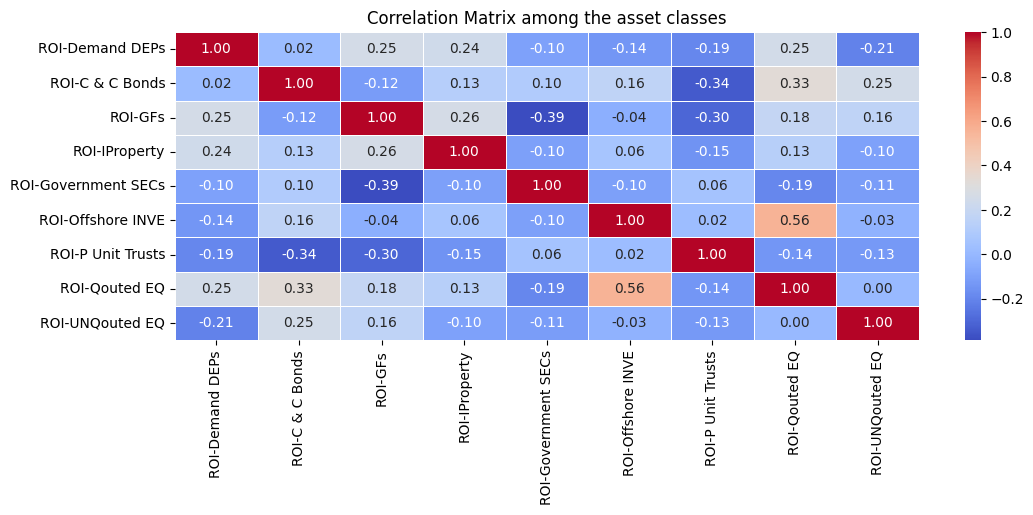

In [25]:
# Plot a heatmap of the correlation matrix

plt.figure(figsize=(12, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix among the asset classes')
plt.show()

# There seems to be postive relationship between Commercial paper/ corporate bond with Unquoted equity and Offshore investments.

# There is also negative relationship between guarenteed funds and government securities.

#Model development

##Markowitz Mean Variance (MV) Portfolio Optimization

Markowitz Portfolio Optimization relies on the principle of balancing risk and return by strategically allocating assets. By considering the correlation and variance among different investments, the optimization process aims to construct a portfolio that achieves the highest possible return for a given level of risk or, conversely, the lowest possible risk for a targeted level of return. This methodology emphasizes the importance of not putting all investment eggs in one basket, promoting diversification as a means to spread risk across different asset classes.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

# Functions to select assets based on correlation and volatility
def absHighPass(cdf_3, absThresh):
    c = cdf_3.columns.values
    a = np.abs(cdf_3.values)
    np.fill_diagonal(a, 0)
    i = np.where(a >= absThresh)[0]
    i = sorted(i)
    return cdf_3.loc[c[i],c[i]]

def absHigh(cdf_3, num):
    c = cdf_3.columns.values
    a = np.abs(cdf_3.values)
    np.fill_diagonal(a, 0)
    i = (-a).argpartition(num, axis=None)[:num]
    i, _ = np.unravel_index(i, a.shape)
    i = sorted(i)
    return cdf_3.loc[c[i],c[i]]

def selLow(cdf_3, num):
    c = cdf_3.columns.values
    a = cdf_3.values
    np.fill_diagonal(a, 0)
    i = (a).argpartition(num, axis=None)[:num]
    i, _ = np.unravel_index(i, a.shape)
    i = sorted(i)
    return cdf_3.loc[c[i],c[i]]

# Calculate average returns for each asset
ra = np.mean(cdf_3, axis=0)

# Create a covariance matrix
covar = cdf_3.cov()

# Calculate annualized volatility for each asset
vols = np.sqrt(np.diagonal(covar))

# Create weights array
num_assets = len(ra)
weights = np.concatenate([np.linspace(start=2, stop=1, num=num_assets),
                          np.zeros(1600),
                          np.linspace(start=-1, stop=-2, num=num_assets)])

# Ensure weights array has the same length as the number of assets
weights = weights[:num_assets]

# Normalize weights to ensure they sum up to 1
weights /= weights.sum()

# Calculate Sharpe Ratio for each asset
sharpe_ratios = ra / vols

# Calculate portfolio mean return
mean_return_mv = np.dot(weights, ra)

# Calculate Sharpe Ratio of the portfolio
sharpe_ratio = np.dot(weights, sharpe_ratios)

# Create a DataFrame to store results
result_df_MV = pd.DataFrame({
    'Asset': ra.index,
    'MV_Weight': weights
})

# Display the result DataFrame
print(result_df_MV)

print("Portfolio Mean Return:", mean_return_mv)

# Display the Sharpe Ratio of the portfolio
print("Portfolio Sharpe Ratio:", sharpe_ratio)

# Save the model
mv_model = {
    'result_df_MV': result_df_MV,
    'portfolio_sharpe_ratio_MV': sharpe_ratio
}

with open('mv_model.sav', 'wb') as f:
    pickle.dump(mv_model, f)

                 Asset  MV_Weight
0      ROI-Demand DEPs       0.15
1      ROI-C & C Bonds       0.14
2              ROI-GFs       0.13
3        ROI-IProperty       0.12
4  ROI-Government SECs       0.11
5    ROI-Offshore INVE       0.10
6    ROI-P Unit Trusts       0.09
7        ROI-Qouted EQ       0.08
8      ROI-UNQouted EQ       0.07
Portfolio Mean Return: 0.06722250830848536
Portfolio Sharpe Ratio: 2.35030614434788


## K-Means Clustering

In [27]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

# Set the originalRows, originalColumns
originalRows = 120   # excluding header
originalColumns = 9  # excluding date

# Extract asset labels
assetLabels = cdf_3.columns[1:originalColumns+1].tolist()

# Extract stock prices excluding header and trading dates
dfAssets_returns = cdf_3.iloc[:, 1:]  # Adjusted to include all rows

# Compute mean returns and variance-covariance matrix of returns
meanReturns = dfAssets_returns.mean()
covReturns = dfAssets_returns.cov()

# Prepare asset parameters for k-means clustering
assetParameters = np.column_stack((meanReturns, covReturns))

# Set the range of clusters to test for hyperparameter tuning
param_grid = {'n_clusters': range(1, 10)}

# Perform hyperparameter tuning using GridSearchCV
kmeans_grid = GridSearchCV(KMeans(), param_grid, cv=5)
kmeans_grid.fit(assetParameters)

# Get the best number of clusters from hyperparameter tuning
best_clusters = kmeans_grid.best_params_['n_clusters']

# Perform K-means clustering with the best number of clusters
assetsCluster = KMeans(n_clusters=best_clusters, algorithm='elkan', max_iter=600)
labels = assetsCluster.fit_predict(assetParameters)

# Initialize a dictionary to store assets in each cluster
cluster_assets = {i: [] for i in range(best_clusters)}

# Assign assets to clusters
for i, label in enumerate(labels):
    cluster_assets[label].append(assetLabels[i])

# Initialize a list to store DataFrame for each cluster
cluster_dfs = []

# Iterate over clusters and allocate weights for each asset
for cluster_num, assets_in_cluster in cluster_assets.items():
    # Select data for the current cluster
    cluster_data = dfAssets_returns[assets_in_cluster]

    # Calculate mean returns, covariance matrix, and volatility for the current cluster
    ra_cluster = cluster_data.mean(axis=0)
    covar_cluster = cluster_data.cov()
    vols_cluster = np.sqrt(np.diagonal(covar_cluster))

    # Calculate weights using mean-variance optimization
    inv_covariance = np.linalg.inv(covar_cluster)
    cluster_weight = inv_covariance @ ra_cluster
    cluster_weight /= np.sum(cluster_weight)

    # Create a DataFrame to store results
    kmeans_df_cluster = pd.DataFrame({
        'Asset': assets_in_cluster,
        'kmeans_cluster_{}'.format(cluster_num): cluster_weight
    })
    cluster_dfs.append(kmeans_df_cluster)

# Concatenate DataFrames for all clusters
kmeans_df = pd.concat(cluster_dfs, ignore_index=True)

# Print the final DataFrame
print(kmeans_df)


                 Asset  kmeans_cluster_0  kmeans_cluster_1  kmeans_cluster_2  \
0    ROI-Offshore INVE              0.30               NaN               NaN   
1      ROI-UNQouted EQ              0.70               NaN               NaN   
2  ROI-Government SECs               NaN              1.00               NaN   
3    ROI-P Unit Trusts               NaN               NaN              0.22   
4        ROI-Qouted EQ               NaN               NaN              0.78   
5      ROI-C & C Bonds               NaN               NaN               NaN   
6              ROI-GFs               NaN               NaN               NaN   
7        ROI-IProperty               NaN               NaN               NaN   

   kmeans_cluster_3  kmeans_cluster_4  kmeans_cluster_5  
0               NaN               NaN               NaN  
1               NaN               NaN               NaN  
2               NaN               NaN               NaN  
3               NaN               NaN          

##Genetic Algorithm

In [30]:
!pip install geneticalgorithm

 The best solution found:
 [0.10386676 0.12977171 0.30991069 0.10729343 0.99414419 0.03936928
 0.18974347 0.13095634 0.33810424]

 Objective function:
 -9.331155361593401


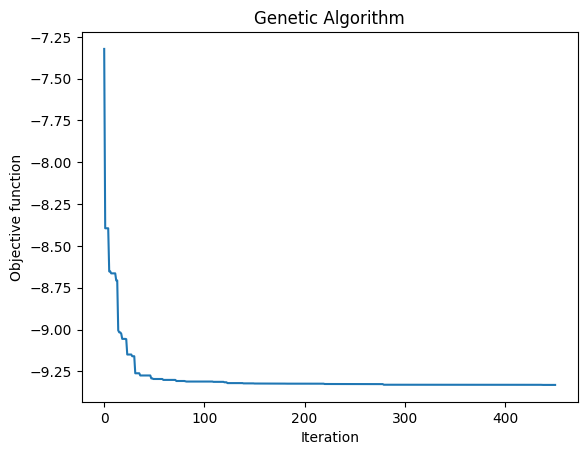

GA_Mean_Return: 0.07638337850573361
Portfolio Sharpe Ratio (GA): 8.126613293031957
List of Assets and Allocated Weights (GA):
ROI-Demand DEPs: 0.04
ROI-C & C Bonds: 0.06
ROI-GFs: 0.13
ROI-IProperty: 0.05
ROI-Government SECs: 0.42
ROI-Offshore INVE: 0.02
ROI-P Unit Trusts: 0.08
ROI-Qouted EQ: 0.06
ROI-UNQouted EQ: 0.14


In [31]:
import math
import random
import numpy as np
import pandas as pd
from geneticalgorithm import geneticalgorithm as ga

# Calculate average returns for each asset
ra = np.mean(cdf_3, axis=0)

# Create a covariance matrix
covar = cdf_3.cov()

# Define the optimization function for Genetic Algorithm
def optimize_weights(weights):
    portfolio_return = np.sum(weights * ra)
    portfolio_volatility = math.sqrt(np.dot(weights.T, np.dot(covar, weights)))
    excess_return = portfolio_return - risk_free_rate
    sharpe_ratio = excess_return / portfolio_volatility
    return -sharpe_ratio  # Minimize negative of Sharpe ratio

# Load data and compute correlation matrix
corr_matrix = cdf_3.corr().values

# Set risk-free rate
risk_free_rate = cdf_3['ROI-Government SECs'].std()

# Set parameters for GA optimization
varbound = np.array([[0, 1]] * len(cdf_3.columns))

# Initialize Genetic Algorithm
model = ga(function=optimize_weights, dimension=len(cdf_3.columns), variable_type='real', variable_boundaries=varbound)

# Run Genetic Algorithm optimization
model.run()

# Retrieve optimized weights from the Genetic Algorithm
optimal_weights = model.output_dict['variable']

# Normalize the weights to sum up to 1
optimal_weights /= np.sum(optimal_weights)

# Compute portfolio Sharpe ratio
portfolio_return = np.sum(optimal_weights * ra)
portfolio_volatility = math.sqrt(np.dot(optimal_weights.T, np.dot(covar, optimal_weights)))
excess_return = portfolio_return - risk_free_rate
ga_portfolio_sharpe_ratio = excess_return / portfolio_volatility

# Calculate expected portfolio return using optimal weights and mean returns
expected_portfolio_return = np.sum(optimal_weights * ra)

# Print GA mean return for the portfolio
print("GA_Mean_Return:", expected_portfolio_return)

# Print the portfolio Sharpe ratio
print("Portfolio Sharpe Ratio (GA):", ga_portfolio_sharpe_ratio)

# Print list of assets and allocated weights
print("List of Assets and Allocated Weights (GA):")
for asset, weight in zip(cdf_3.columns, optimal_weights):
    print(f"{asset}: {weight:.2f}")

# Create a DataFrame to store results
ga_df_result = pd.DataFrame({
    'Asset': cdf_3.columns,
    'GA_Weight': optimal_weights
})

# Save the GA model
# Replace 'ga_model.pkl' with your desired filename
with open('ga_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [32]:
ga_df_result

,Asset,GA_Weight
0,ROI-Demand DEPs,0.04
1,ROI-C & C Bonds,0.06
2,ROI-GFs,0.13
3,ROI-IProperty,0.05
4,ROI-Government SECs,0.42
5,ROI-Offshore INVE,0.02
6,ROI-P Unit Trusts,0.08
7,ROI-Qouted EQ,0.06
8,ROI-UNQouted EQ,0.14


##Particle Swam Optimization

In [33]:
import math
import random
import numpy as np
import pandas as pd

class Particle:
    def __init__(self, num_assets):
        self.position = np.random.rand(num_assets)
        self.velocity = np.random.rand(num_assets)
        self.best_position = self.position.copy()
        self.best_fitness = float('-inf')

class ParticleSwarmOptimization:
    def __init__(self, returns, corr_matrix, risk_free, population_size, max_iterations):
        self.returns = returns
        self.corr_matrix = corr_matrix
        self.risk_free = risk_free
        self.population_size = population_size
        self.max_iterations = max_iterations
        self.num_assets = returns.shape[1]
        self.population = [Particle(self.num_assets) for _ in range(population_size)]
        self.global_best_position = np.zeros(self.num_assets)
        self.global_best_fitness = float('-inf')

    def fitness(self, weights):
        mean_returns = np.mean(self.returns, axis=0)
        portfolio_return = np.sum(weights * mean_returns)
        covariance_matrix = np.cov(self.returns, rowvar=False)
        portfolio_volatility = math.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
        excess_return = portfolio_return - self.risk_free
        sharpe_ratio = excess_return / portfolio_volatility
        return sharpe_ratio

    def update_particle_best(self, particle):
        particle_fitness = self.fitness(particle.position)
        if particle_fitness > particle.best_fitness:
            particle.best_position = particle.position.copy()
            particle.best_fitness = particle_fitness

    def update_global_best(self):
        for particle in self.population:
            if particle.best_fitness > self.global_best_fitness:
                self.global_best_position = particle.best_position.copy()
                self.global_best_fitness = particle.best_fitness

    def update_velocity(self, particle):
        inertia_weight = 0.5
        cognitive_weight = 1.5
        social_weight = 2.0
        r1 = random.random()
        r2 = random.random()
        cognitive_component = cognitive_weight * r1 * (particle.best_position - particle.position)
        social_component = social_weight * r2 * (self.global_best_position - particle.position)
        particle.velocity = inertia_weight * particle.velocity + cognitive_component + social_component

    def update_position(self, particle):
        particle.position += particle.velocity
        particle.position = np.clip(particle.position, 0, 1)

    def optimize(self):
        for _ in range(self.max_iterations):
            for particle in self.population:
                self.update_particle_best(particle)
            self.update_global_best()
            for particle in self.population:
                self.update_velocity(particle)
                self.update_position(particle)
        return self.global_best_position


# Load data and compute correlation matrix
corr_matrix = cdf_3.corr().values

# Set risk-free rate
risk_free_rate = cdf_3['ROI-Government SECs'].std()

# Set parameters for PSO optimization
population_size = 50
max_iterations = 10

# Create an instance of ParticleSwarmOptimization
pso = ParticleSwarmOptimization(cdf_3.values, corr_matrix, risk_free_rate, population_size, max_iterations)

# Run PSO optimization
optimal_weights = pso.optimize()

# Normalize the weights to sum up to 1
optimal_weights /= np.sum(optimal_weights)


# Compute portfolio Sharpe ratio
mean_returns = np.mean(cdf_3.values, axis=0)
portfolio_return = np.sum(optimal_weights * mean_returns)
covariance_matrix = np.cov(cdf_3.values, rowvar=False)
portfolio_volatility = math.sqrt(np.dot(optimal_weights.T, np.dot(covariance_matrix, optimal_weights)))
excess_return = portfolio_return - risk_free_rate
pso_portfolio_sharpe_ratio = excess_return / portfolio_volatility

# Calculate expected portfolio return using optimal weights and mean returns
expected_portfolio_return = np.sum(optimal_weights * np.mean(cdf_3.values, axis=0))

# Print PSO mean return for the portfolio
print("PSO_Mean_Return:", expected_portfolio_return)

# Print the portfolio Sharpe ratio
print("Portfolio Sharpe Ratio (PSO):", pso_portfolio_sharpe_ratio)

# Print list of assets and allocated weights
print("List of Assets and Allocated Weights (PSO):")
for asset, weight in zip(cdf_3.columns, optimal_weights):
    print(f"{asset}: {weight:.2f}")

# Create a DataFrame to store results
pso_df_result = pd.DataFrame({
    'Asset': cdf_3.columns,
    'PSO_Weight': optimal_weights
})



# Save the PSO model
# Replace 'pso_model.pkl' with your desired filename
with open('pso_model.pkl', 'wb') as f:
    pickle.dump(pso, f)


PSO_Mean_Return: 0.06900365267609487
Portfolio Sharpe Ratio (PSO): 6.117461441350952
List of Assets and Allocated Weights (PSO):
ROI-Demand DEPs: 0.05
ROI-C & C Bonds: 0.11
ROI-GFs: 0.22
ROI-IProperty: 0.03
ROI-Government SECs: 0.22
ROI-Offshore INVE: 0.00
ROI-P Unit Trusts: 0.14
ROI-Qouted EQ: 0.01
ROI-UNQouted EQ: 0.22


## SVM Classifier

In [34]:
import pickle
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

# Load and preprocess data
# Assuming cdf_3 is already defined

# Set the originalRows, originalColumns
originalRows = 120   #excluding header
originalColumns = 9  #excluding date

# Extract asset labels
assetLabels = cdf_3.columns[1:originalColumns+1].tolist()

# Extract stock returns excluding header and trading dates
dfAssets_returns = cdf_3.iloc[0:, 1:]

# Store stock returns as an array
ardfAssets_returns = np.asarray(dfAssets_returns)

# Compute mean returns and variance-covariance matrix of returns
meanReturns = np.mean(ardfAssets_returns, axis=0)
covReturns = np.cov(ardfAssets_returns, rowvar=False)

# Prepare asset parameters for SVM classification
assetParameters = np.concatenate([meanReturns.reshape(-1, 1), covReturns], axis=1)

# Perform hyperparameter tuning for SVM using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf', 'linear', 'poly']}
svm_grid = GridSearchCV(SVC(probability=True), param_grid, cv=2)
svm_grid.fit(assetParameters, labels)  # Assuming 'labels' from the previous KMeans clustering

# Get the best SVM model from hyperparameter tuning
best_svm = svm_grid.best_estimator_

# Predict labels for asset clusters using the best SVM model
svm_labels = best_svm.predict(assetParameters)

# Store asset labels with their respective cluster labels
cluster_assets = {}
for i, label in enumerate(svm_labels):
    if label not in cluster_assets:
        cluster_assets[label] = []
    cluster_assets[label].append(assetLabels[i])

# Iterate over clusters and allocate weights for each asset
for cluster_num, cluster_assets in cluster_assets.items():
    # Select data for the current cluster
    cluster_data = dfAssets_returns[cluster_assets]

    # Calculate mean returns, covariance matrix, and volatility for the current cluster
    ra_cluster = cluster_data.mean(axis=0)
    covar_cluster = cluster_data.cov()
    vols_cluster = np.sqrt(np.diagonal(covar_cluster))

    # Calculate weights using mean-variance optimization or any other method
    # Here, you can use any portfolio optimization technique like Mean-Variance Optimization, Risk Parity, etc.
    # For example, we can use the inverse covariance matrix approach
    inv_covariance = np.linalg.inv(covar_cluster)
    cluster_weight = inv_covariance @ ra_cluster
    cluster_weight /= np.sum(cluster_weight)

    # Create a DataFrame to store results
    svm_df_cluster = pd.DataFrame({
        'Asset': cluster_assets,
        'svm_Weight_cluster_{}'.format(cluster_num): cluster_weight
    })

    # Display the result DataFrame for each cluster
    print("Cluster", cluster_num)
    print(svm_df_cluster)

# Save the best SVM model using pickle
with open('best_svm_model.pkl', 'wb') as f:
    pickle.dump(best_svm, f)


Cluster 2
                 Asset  svm_Weight_cluster_2
0      ROI-C & C Bonds                  0.06
1              ROI-GFs                  0.18
2  ROI-Government SECs                  0.57
3    ROI-P Unit Trusts                  0.09
4        ROI-Qouted EQ                  0.11
Cluster 0
               Asset  svm_Weight_cluster_0
0      ROI-IProperty                  0.50
1  ROI-Offshore INVE                  0.08
2    ROI-UNQouted EQ                  0.42


# All portfolios

In [35]:
cresult_df_mv = result_df_MV.set_index('Asset').T
ckmeans_df = kmeans_df.set_index('Asset').T
cpso_df_result = pso_df_result.set_index('Asset').T
csvm_df_cluster = svm_df_cluster.set_index('Asset').T
cga_df_result = ga_df_result.set_index('Asset').T

In [36]:
def combine_and_merge_weights(dfs, avg_return_col):
  """
  Combines multiple DataFrames with asset weights (rows) and an "Asset" column as the index, excludes a specified average return row,
  and merges them into a single DataFrame.

  Args:
      dfs (list): List of DataFrames containing asset weights as rows (indexed by "Asset").
      avg_return_col (str): Name of the row containing average return (to be excluded from merging).

  Returns:
      pd.DataFrame: The combined DataFrame with weights from each DataFrame (excluding average return).
  """

  # Get all unique asset labels from all DataFrames (as a list, not set)
  all_asset_labels = list(set.union(*[set(df.index) for df in dfs]))

  # Create the empty combined DataFrame with all asset labels as the index
  combined_df = pd.DataFrame(columns=dfs[0].columns, index=all_asset_labels)  # Use first DataFrame's columns

  # Iterate through each DataFrame and add weights to the combined DataFrame
  for df in dfs:
      # Extract and store the average return row (if present)
      avg_return = None
      if avg_return_col in df.index:
          avg_return = df.loc[avg_return_col]
          df = df.drop(avg_return_col)  # Remove avg_return row from weights

      # Fill missing assets with 0 (assuming weights might be missing)
      df = df.reindex(all_asset_labels, fill_value=0)  # Optional depending on your data

      # Add weights from the current DataFrame to the combined DataFrame
      combined_df = combined_df.add(df, fill_value=0)

  # Add the average return row back (if present) as the first row
  if avg_return is not None:
      combined_df.loc[avg_return_col] = avg_return

  return combined_df

# Assuming DataFrames are defined correctly and have "Asset" as the index
# Specify the column name containing average return (adjust if necessary)
avg_return_col = "Average Return"

# Combine the DataFrames (without normalization)
combined_weights_df = combine_and_merge_weights([cresult_df_mv, ckmeans_df, cpso_df_result, csvm_df_cluster, cga_df_result], avg_return_col)



# Set intersection of asset names (assuming unique asset names)
common_assets = set(combined_weights_df.columns) & set(ra.index)

# Check for missing assets (optional)
missing_assets = list(combined_weights_df.columns.difference(common_assets))
if missing_assets:
    print(f"Warning: Missing assets in combined_weights_df: {missing_assets}")

# Calculate portfolio mean for each row
combined_weights_df["portfolio_mean"] = np.nan  # Initialize with NaN for unmatched assets

for idx in combined_weights_df.index:
    matching_weights = combined_weights_df.loc[idx, list(common_assets)]  # Convert common_assets to list
    portfolio_mean = np.dot(matching_weights, ra.loc[list(common_assets)])  # Dot product for weighted sum
    combined_weights_df.loc[idx, "portfolio_mean"] = portfolio_mean

# Calculate portfolio Sharpe ratio for each row
combined_weights_df["portfolio_sharpe_ratios"] = np.nan  # Initialize with NaN

for idx in combined_weights_df.index:
    matching_weights = combined_weights_df.loc[idx, list(common_assets)]  # Convert common_assets to list
    portfolio_sharpe_ratio = np.dot(matching_weights, sharpe_ratios.loc[list(common_assets)])
    combined_weights_df.loc[idx, "portfolio_sharpe_ratios"] = portfolio_sharpe_ratio

# Print the updated DataFrame
combined_weights_df

Asset,ROI-C & C Bonds,ROI-Demand DEPs,ROI-GFs,ROI-Government SECs,ROI-IProperty,ROI-Offshore INVE,ROI-P Unit Trusts,ROI-Qouted EQ,ROI-UNQouted EQ,portfolio_mean,portfolio_sharpe_ratios
PSO_Weight,0.11,0.05,0.22,0.22,0.03,0.00,0.14,0.01,0.22,0.07,2.74
kmeans_cluster_1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.11,7.11
svm_Weight_cluster_0,0.00,0.00,0.00,0.00,0.50,0.08,0.00,0.00,0.42,0.01,0.99
GA_Weight,0.06,0.04,0.13,0.42,0.05,0.02,0.08,0.06,0.14,0.08,3.87
kmeans_cluster_0,0.00,0.00,0.00,0.00,0.00,0.30,0.00,0.00,0.70,0.00,0.29
kmeans_cluster_2,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.78,0.00,0.05,2.04
MV_Weight,0.14,0.15,0.13,0.11,0.12,0.10,0.09,0.08,0.07,0.07,2.35
kmeans_cluster_3,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,2.81
kmeans_cluster_5,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.02,1.70
kmeans_cluster_4,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,1.92


In [37]:
combined_weights_df.columns

Index(['ROI-C & C Bonds', 'ROI-Demand DEPs', 'ROI-GFs', 'ROI-Government SECs',
       'ROI-IProperty', 'ROI-Offshore INVE', 'ROI-P Unit Trusts',
       'ROI-Qouted EQ', 'ROI-UNQouted EQ', 'portfolio_mean',
       'portfolio_sharpe_ratios'],
      dtype='object', name='Asset')